In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.formula.api import ols

In [7]:
#한글설정
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [92]:
birth = pd.read_csv("./kalma/birth_M.csv",encoding='CP949')
cpi = pd.read_csv("./kalma/CPI_M.csv",encoding='CP949')
marry = pd.read_csv("./kalma/marry_M.csv",encoding='CP949')
job = pd.read_csv("./kalma/woman_job.csv",encoding='CP949')

In [93]:
birth['시점']=pd.to_datetime(birth['시점'])
cpi['시점']=pd.to_datetime(cpi['시점'])
marry['시점']=pd.to_datetime(marry['시점'])
job['시점']=pd.to_datetime(job['시점'])

# All Variables Plots

<Axes: >

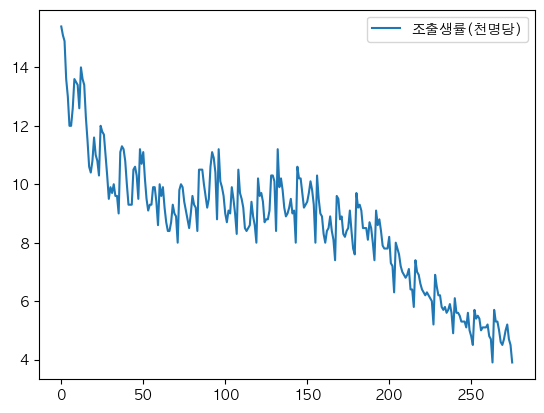

In [85]:
birth.plot()

<Axes: >

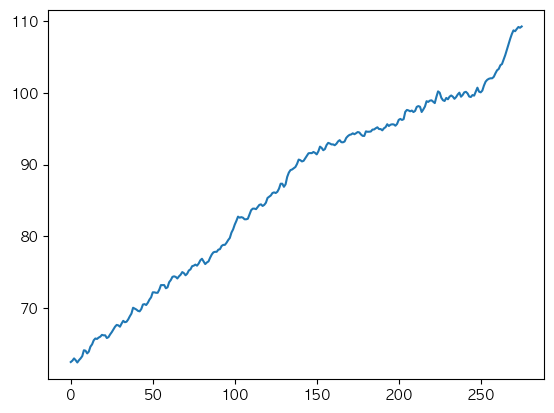

In [20]:
cpi['0 총지수'].plot()

<Axes: >

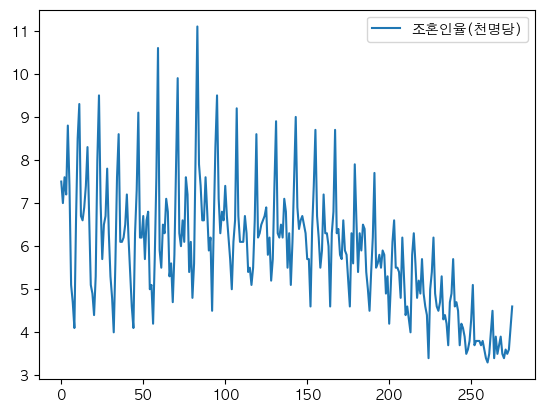

In [22]:
marry.plot()

<Axes: >

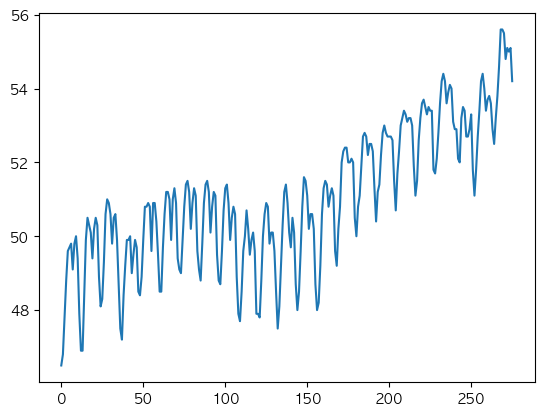

In [23]:
job['경제활동참가율 (%)'].plot()

In [24]:
birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   시점         276 non-null    object 
 1   조출생률(천명당)  276 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.4+ KB


In [25]:
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시점           276 non-null    float64
 1   경제활동참가율 (%)  276 non-null    float64
 2   실업률 (%)      276 non-null    float64
 3   고용률 (%)      276 non-null    float64
dtypes: float64(4)
memory usage: 8.8 KB


In [26]:
cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   시점                276 non-null    float64
 1   0 총지수             276 non-null    float64
 2   01 식료품 및 비주류음료    276 non-null    float64
 3   02 주류 및 담배        276 non-null    float64
 4   03 의류 및 신발        276 non-null    float64
 5   04 주택 수도 전기 및 연료  276 non-null    float64
 6   05 가정용품 및 가사 서비스  276 non-null    float64
 7   06 보건             276 non-null    float64
 8   07 교통             276 non-null    float64
 9   08 통신             276 non-null    float64
 10  09 오락 및 문화        276 non-null    float64
 11  10 교육             276 non-null    float64
 12  11 음식 및 숙박        276 non-null    float64
 13  12 기타 상품 및 서비스    276 non-null    float64
dtypes: float64(14)
memory usage: 30.3 KB


In [27]:
marry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   행정구역별(1)   276 non-null    object 
 1   시점         276 non-null    object 
 2   조혼인율(천명당)  276 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.6+ KB


# Ways to select representers among CPI's Var & Womans Job

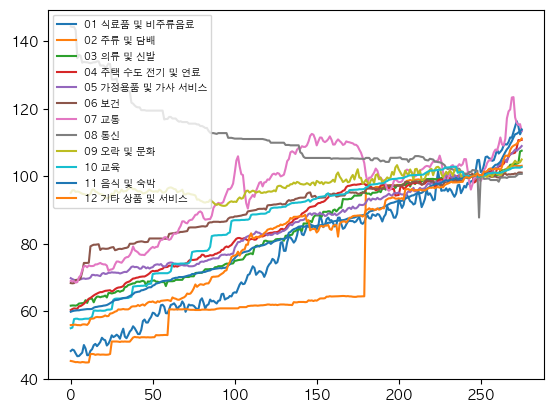

In [50]:
for i in range(2,len(cpi.columns)):
    plt.plot(cpi.iloc[:,i],label=cpi.columns[i])
    plt.legend(fontsize="7")
plt.show()

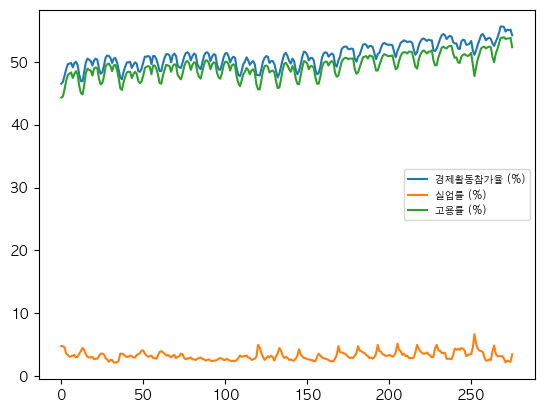

In [53]:
for i in range(1,len(job.columns)):
    plt.plot(job.iloc[:,i],label=job.columns[i])
    plt.legend(fontsize="7")
plt.show()

In [94]:
cpi_t = cpi[['시점','0 총지수']]
job_p = job[['시점','경제활동참가율 (%)']]
df1 = pd.merge(cpi_t,job_p)
df1

,시점,0 총지수,경제활동참가율 (%)
0,2000-01-01,62.456,46.5
1,2000-02-01,62.647,46.8
2,2000-03-01,62.962,47.8
3,2000-04-01,62.709,48.8
4,2000-05-01,62.393,49.6
...,...,...,...
271,2022-08-01,108.620,54.8
272,2022-09-01,108.930,55.1
273,2022-10-01,109.210,55.0
274,2022-11-01,109.100,55.1


In [95]:
df2=pd.merge(marry,birth)
df2

,시점,조혼인율(천명당),조출생률(천명당)
0,2000-01-01,7.5,15.4
1,2000-02-01,7.0,15.1
2,2000-03-01,7.6,14.9
3,2000-04-01,7.2,13.6
4,2000-05-01,8.8,13.0
...,...,...,...
271,2022-08-01,3.6,5.0
272,2022-09-01,3.5,5.2
273,2022-10-01,3.6,4.7
274,2022-11-01,4.1,4.5


In [96]:
df=pd.merge(df1,df2)
df

,시점,0 총지수,경제활동참가율 (%),조혼인율(천명당),조출생률(천명당)
0,2000-01-01,62.456,46.5,7.5,15.4
1,2000-02-01,62.647,46.8,7.0,15.1
2,2000-03-01,62.962,47.8,7.6,14.9
3,2000-04-01,62.709,48.8,7.2,13.6
4,2000-05-01,62.393,49.6,8.8,13.0
...,...,...,...,...,...
271,2022-08-01,108.620,54.8,3.6,5.0
272,2022-09-01,108.930,55.1,3.5,5.2
273,2022-10-01,109.210,55.0,3.6,4.7
274,2022-11-01,109.100,55.1,4.1,4.5


In [98]:
df.set_index('시점',inplace=True)
df

,0 총지수,경제활동참가율 (%),조혼인율(천명당),조출생률(천명당)
시점,,,,
2000-01-01,62.456,46.5,7.5,15.4
2000-02-01,62.647,46.8,7.0,15.1
2000-03-01,62.962,47.8,7.6,14.9
2000-04-01,62.709,48.8,7.2,13.6
2000-05-01,62.393,49.6,8.8,13.0
...,...,...,...,...
2022-08-01,108.620,54.8,3.6,5.0
2022-09-01,108.930,55.1,3.5,5.2
2022-10-01,109.210,55.0,3.6,4.7


In [111]:
df.columns=['cpi','job','marry','birth']

# Correlation with variables

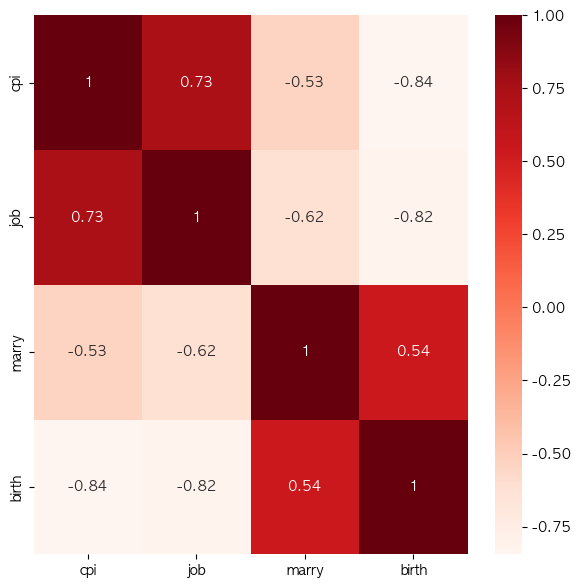

In [112]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,cmap='Reds')
plt.show()

In [100]:
def crosscorr(x,y,l):
    L=[]
    for i in range(len(x)-l):
        s1=0
        s2=0
        s3=0
        for j in range(i,i+l):
            s1+=(x[j]-np.mean(x[i:i+l]))*(y[j]-np.mean(y[i:i+l]))
            s2+=(x[j]-np.mean(x[i:i+l]))**2
            s3+=(y[j]-np.mean(y[i:i+l]))**2
        L.append(s1/((s3**0.5)*(s2**0.5)))
    return L

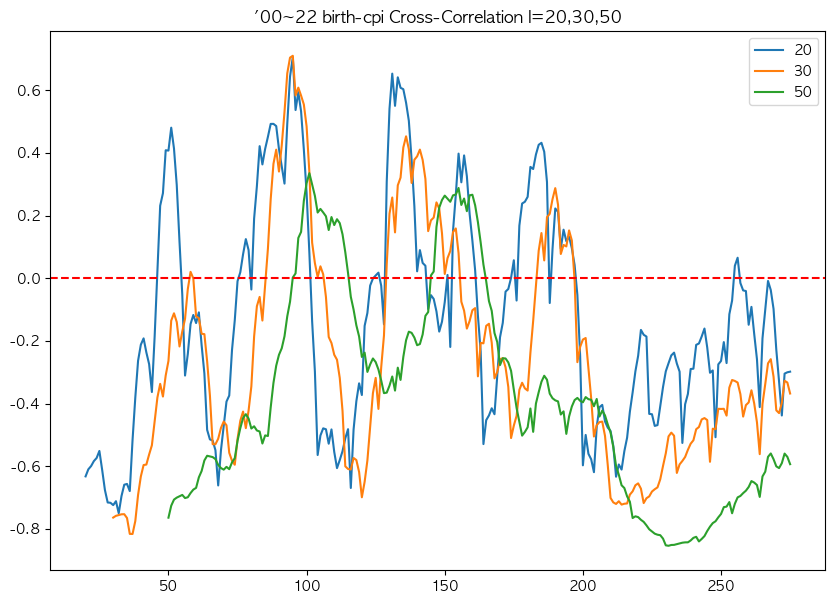

In [119]:
plt.figure(figsize=(10,7))
ll=[20,30,50]
for i in range(len(ll)):
    a=crosscorr(df['cpi'],df['birth'],ll[i])
    plt.plot(range(ll[i],ll[i]+len(a)),a)
plt.legend(ll)
plt.title('\'00~22 birth-cpi Cross-Correlation l=20,30,50')
plt.axhline(0,color='red',linestyle='--')
plt.show()

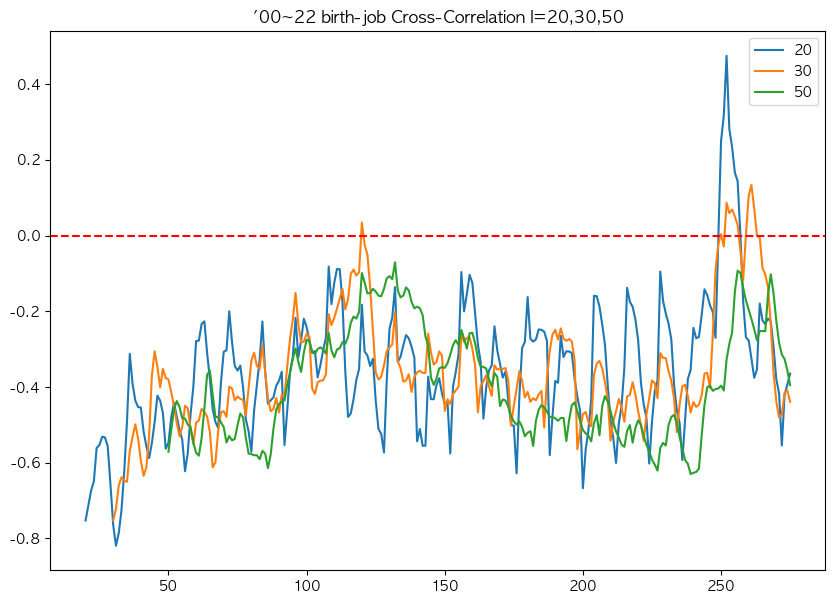

In [120]:
plt.figure(figsize=(10,7))
ll=[20,30,50]
for i in range(len(ll)):
    a=crosscorr(df['job'],df['birth'],ll[i])
    plt.plot(range(ll[i],ll[i]+len(a)),a)
plt.legend(ll)
plt.title('\'00~22 birth-job Cross-Correlation l=20,30,50')
plt.axhline(0,color='red',linestyle='--')
plt.show()

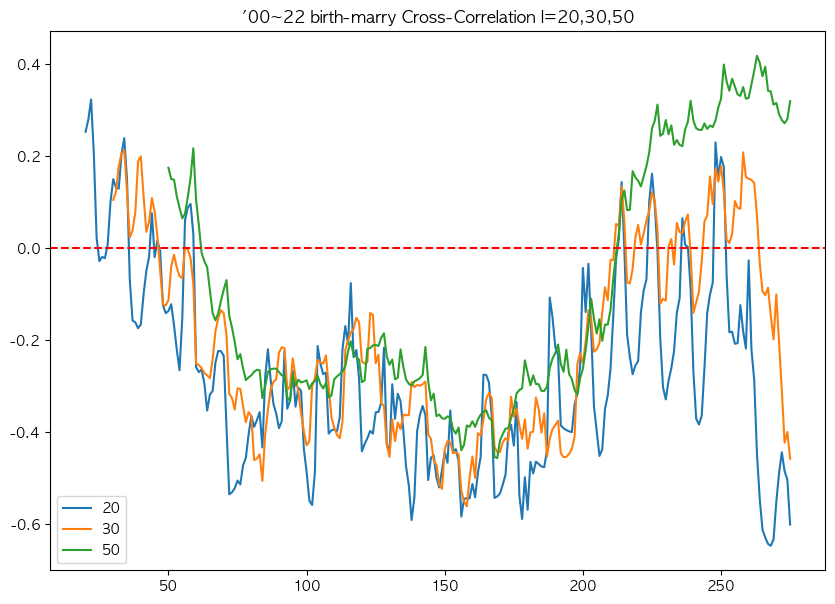

In [121]:
plt.figure(figsize=(10,7))
ll=[20,30,50]
for i in range(len(ll)):
    a=crosscorr(df['marry'],df['birth'],ll[i])
    plt.plot(range(ll[i],ll[i]+len(a)),a)
plt.legend(ll)
plt.title('\'00~22 birth-marry Cross-Correlation l=20,30,50')
plt.axhline(0,color='red',linestyle='--')
plt.show()

In [122]:
df.to_csv('all_data.csv',encoding='CP949')

In [123]:
df.head()

,cpi,job,marry,birth
시점,,,,
2000-01-01,62.456,46.5,7.5,15.4
2000-02-01,62.647,46.8,7.0,15.1
2000-03-01,62.962,47.8,7.6,14.9
2000-04-01,62.709,48.8,7.2,13.6
2000-05-01,62.393,49.6,8.8,13.0


In [181]:
Bt=pd.read_csv('B_t.csv')
Mt=pd.read_csv('M_t.csv')

# M_t Model

In [182]:
Bt.head()

,b_t,m_t_1,b_t_1,job,cpi
0,15.1,7.5,15.4,46.8,62.647
1,14.9,7.0,15.1,47.8,62.962
2,13.6,7.6,14.9,48.8,62.709
3,13.0,7.2,13.6,49.6,62.393
4,12.0,8.8,13.0,49.7,62.709


In [183]:
mt_model = ols(formula = 'm_t ~ m_t_1 + b_t_1 + cpi + job',data = Mt).fit()
print(mt_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    m_t   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     78.74
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           3.46e-44
Time:                        00:39:37   Log-Likelihood:                -380.53
No. Observations:                 275   AIC:                             771.1
Df Residuals:                     270   BIC:                             789.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1140      3.422      0.618      0.5

In [184]:
eps=[]
for i in range(len(Mt)):
    e=Mt.m_t[i] - 0.4654 * Mt.m_t_1[i] - 0.2572 * Mt.b_t_1[i] - 0.0096 * Mt.cpi[i] + 0.0398 * Mt.job[i]
    eps.append(e)
Mt['eps'] = pd.Series(eps)

In [185]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
Mt.set_index(df.index[1:],inplace=True)
ma_model_1 = SARIMAX(Mt.eps.values, order=(0,0,1),trend=None)
mt_model_fit = ma_model_1.fit()
mt_model_fit.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.01315D+00    |proj g|=  1.85717D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      7      1     0     0   9.650D-06   1.946D+00
  F =   1.9457850616600691     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  275
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -535.091
Date:                Sat, 22 Apr 2023   AIC                           1074.182
Time:                        00:39:40   BIC                           1081.415
Sample:                             0   HQIC                          1077.085
                                - 275                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6425      0.050     12.954      0.000       0.545       0.740
sigma2         2.8627      0.295      9.702      0.000       2.284       3.441
===================================================================================
Ljung-Box (L1) (Q):                  69.82   Jarque-Bera (JB):                 6.31
Prob(Q):                              0.00   Prob(JB):                         0.04
Heteroskedasticity (H):               0.61   Skew:                            -0.06
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [186]:
Mt.head()

,m_t,m_t_1,cpi,b_t_1,job,eps
시점,,,,,,
2000-02-01,7.0,7.5,62.647,15.4,46.8,0.809849
2000-03-01,7.6,7.0,62.962,15.1,47.8,1.756485
2000-04-01,7.2,7.6,62.709,14.9,48.8,1.170914
2000-05-01,8.8,7.2,62.393,13.6,49.6,3.326307
2000-06-01,7.4,8.8,62.709,13.0,49.7,1.336934


# B_T model

In [178]:
bt_model = ols(formula = 'b_t ~ m_t_1 + b_t_1 + cpi + job',data = Bt).fit()
print(bt_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    b_t   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     791.2
Date:                Sat, 22 Apr 2023   Prob (F-statistic):          9.66e-148
Time:                        00:37:39   Log-Likelihood:                -252.53
No. Observations:                 275   AIC:                             515.1
Df Residuals:                     270   BIC:                             533.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.4681      2.149      5.803      0.0

In [195]:
eps1=[]
for i in range(len(Bt)):
    e=Bt.b_t[i] - 0.1348 * Bt.m_t_1[i] - 0.6931 * Bt.b_t_1[i] + 0.0158 * Bt.cpi[i] + 0.1819 * Bt.job[i]
    eps1.append(e)
Bt['eps'] = pd.Series(eps1)

In [196]:
Bt.head()

,b_t,m_t_1,b_t_1,job,cpi,eps
0,15.1,7.5,15.4,46.8,62.647,12.918003
1,14.9,7.0,15.1,47.8,62.962,13.180210
2,13.6,7.6,14.9,48.8,62.709,12.115852
3,13.0,7.2,13.6,49.6,62.393,12.611329
4,12.0,8.8,13.0,49.7,62.709,11.834692


In [197]:
Mt.set_index(df.index[1:],inplace=True)
ma_model_1 = SARIMAX(Mt.eps.values, order=(0,0,1),trend=None)
mt_model_fit = ma_model_1.fit()
mt_model_fit.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.01315D+00    |proj g|=  1.85717D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      7      1     0     0   9.650D-06   1.946D+00
  F =   1.9457850616600691     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  275
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -535.091
Date:                Sat, 22 Apr 2023   AIC                           1074.182
Time:                        00:46:56   BIC                           1081.415
Sample:                             0   HQIC                          1077.085
                                - 275                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6425      0.050     12.954      0.000       0.545       0.740
sigma2         2.8627      0.295      9.702      0.000       2.284       3.441
===================================================================================
Ljung-Box (L1) (Q):                  69.82   Jarque-Bera (JB):                 6.31
Prob(Q):                              0.00   Prob(JB):                         0.04
Heteroskedasticity (H):               0.61   Skew:                            -0.06
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""